In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('llama2_swap_attack_results.csv')

In [3]:
df.dropna(axis=0,inplace=True)

In [4]:
df.head()

,sample_idx,reconstruction_idx,layer_0_min_abs_diff,layer_0_mean_abs_diff,layer_0_max_abs_diff,layer_1_min_abs_diff,layer_1_mean_abs_diff,layer_1_max_abs_diff,layer_2_min_abs_diff,layer_2_mean_abs_diff,...,layer_29_mean_abs_diff,layer_29_max_abs_diff,layer_30_min_abs_diff,layer_30_mean_abs_diff,layer_30_max_abs_diff,layer_31_min_abs_diff,layer_31_mean_abs_diff,layer_31_max_abs_diff,all_layers_max_diff,all_layers_min_of_max
0,0,0,0.000008,0.841897,4.778656,0.000000,0.874854,752.663086,0.000015,0.873125,...,1.696703,758.687500,0.0,1.805682,389.171875,0.0,2.060870,591.935547,773.369141,4.778656
1,0,1,0.000038,0.866387,5.342865,0.000031,0.893797,755.466309,0.000000,0.891864,...,1.868850,766.548828,0.0,2.038367,399.192383,0.0,2.494252,545.562500,781.789062,5.342865
2,0,2,0.000000,0.865448,5.270142,0.000000,0.893563,753.627441,0.000000,0.891523,...,1.778145,753.687500,0.0,1.901487,384.460938,0.0,2.163877,485.685547,769.066406,5.270142
3,1,0,0.000031,0.857910,5.416992,0.000000,0.884815,753.143555,0.000000,0.883237,...,1.776661,759.773438,0.0,1.890995,454.671875,0.0,2.097044,253.968750,771.514160,5.416992
4,1,1,0.000069,0.854333,5.024796,0.000015,0.882152,754.338867,0.000023,0.880333,...,1.676831,755.632812,0.0,1.747169,388.132812,0.0,1.956314,449.435547,770.439453,5.024796


In [5]:
min_columns = [f'layer_{i}_min_abs_diff' for i in range(32)]  # All 32 layers
df['all_layers_max_of_min'] = df[min_columns].max(axis=1)


In [6]:
df.columns

Index(['sample_idx', 'reconstruction_idx', 'layer_0_min_abs_diff',
       'layer_0_mean_abs_diff', 'layer_0_max_abs_diff', 'layer_1_min_abs_diff',
       'layer_1_mean_abs_diff', 'layer_1_max_abs_diff', 'layer_2_min_abs_diff',
       'layer_2_mean_abs_diff',
       ...
       'layer_29_max_abs_diff', 'layer_30_min_abs_diff',
       'layer_30_mean_abs_diff', 'layer_30_max_abs_diff',
       'layer_31_min_abs_diff', 'layer_31_mean_abs_diff',
       'layer_31_max_abs_diff', 'all_layers_max_diff', 'all_layers_min_of_max',
       'all_layers_max_of_min'],
      dtype='object', length=101)

In [7]:
df['all_layers_max_of_min'].min(), df['all_layers_max_of_min'].max()

(1.52587890625e-05, 0.0001220703125)

In [8]:
df.tail(55)

,sample_idx,reconstruction_idx,layer_0_min_abs_diff,layer_0_mean_abs_diff,layer_0_max_abs_diff,layer_1_min_abs_diff,layer_1_mean_abs_diff,layer_1_max_abs_diff,layer_2_min_abs_diff,layer_2_mean_abs_diff,...,layer_29_max_abs_diff,layer_30_min_abs_diff,layer_30_mean_abs_diff,layer_30_max_abs_diff,layer_31_min_abs_diff,layer_31_mean_abs_diff,layer_31_max_abs_diff,all_layers_max_diff,all_layers_min_of_max,all_layers_max_of_min
0,0,0,0.000008,0.841897,4.778656,0.000000,0.874854,752.663086,0.000015,0.873125,...,758.687500,0.0,1.805682,389.171875,0.0,2.060870,591.935547,773.369141,4.778656,0.000122
1,0,1,0.000038,0.866387,5.342865,0.000031,0.893797,755.466309,0.000000,0.891864,...,766.548828,0.0,2.038367,399.192383,0.0,2.494252,545.562500,781.789062,5.342865,0.000061
2,0,2,0.000000,0.865448,5.270142,0.000000,0.893563,753.627441,0.000000,0.891523,...,753.687500,0.0,1.901487,384.460938,0.0,2.163877,485.685547,769.066406,5.270142,0.000122
3,1,0,0.000031,0.857910,5.416992,0.000000,0.884815,753.143555,0.000000,0.883237,...,759.773438,0.0,1.890995,454.671875,0.0,2.097044,253.968750,771.514160,5.416992,0.000092
4,1,1,0.000069,0.854333,5.024796,0.000015,0.882152,754.338867,0.000023,0.880333,...,755.632812,0.0,1.747169,388.132812,0.0,1.956314,449.435547,770.439453,5.024796,0.000076
5,1,2,0.000015,0.845554,4.663177,0.000038,0.876318,754.238525,0.000061,0.873970,...,751.656250,0.0,1.859639,382.687500,0.0,2.130347,504.435547,768.414062,4.663177,0.000099
6,2,0,0.000015,0.882299,5.206202,0.000012,0.909246,751.570312,0.000000,0.907615,...,755.320312,0.0,1.916921,385.875000,0.0,2.037439,137.109375,761.769531,5.206202,0.000015
7,2,1,0.000015,0.851960,4.924219,0.000000,0.879252,754.451660,0.000000,0.877088,...,760.222656,0.0,1.864536,405.666016,0.0,2.039563,362.935547,769.539062,4.924219,0.000122
8,2,2,0.000000,0.865542,5.844116,0.000000,0.893654,755.166992,0.000000,0.891307,...,766.461914,0.0,2.082727,392.968750,0.0,2.572311,520.281250,772.491699,5.844116,0.000122


C:\Users\hskay\AppData\Local\Temp\ipykernel_29212\154458015.py:81: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(sorted_data.min() * 0.5, sorted_data.max() * 2)


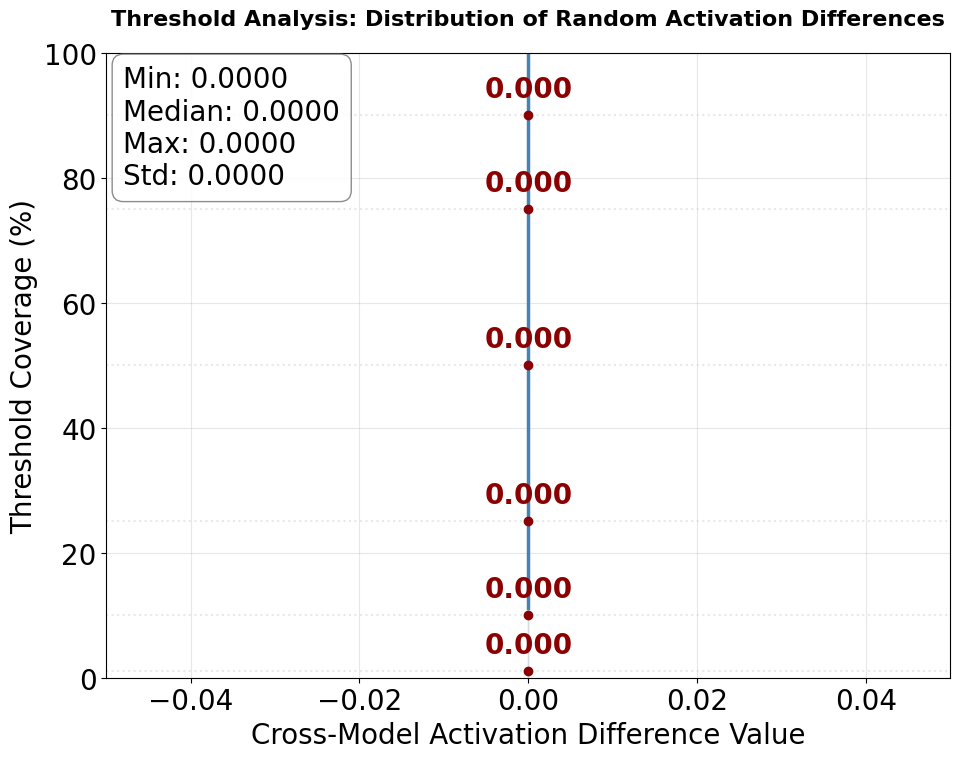


CUMULATIVE DISTRIBUTION ANALYSIS

Total samples: 9

Summary Statistics for Max of Min values:
--------------------------------------------------
Minimum value: 0.0000
Maximum value: 0.0000
Mean value: 0.000000
Median value: 0.0000
Standard deviation: 0.0000

Key Percentiles:
--------------------------------------------------


C:\Users\hskay\AppData\Local\Temp\ipykernel_29212\154458015.py:18: RuntimeWarning: divide by zero encountered in log10
  exponent = int(np.floor(np.log10(abs(val))))


OverflowError: cannot convert float infinity to integer

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def format_percentile_not_bold(val):
    if val < 0.001:
        return f"{val:.4f}"
        exponent = int(np.floor(np.log10(abs(val))))
        mantissa = val / (10 ** exponent)
        return f"${mantissa:.2f} \\times 10^{{{exponent}}}$"
    elif val < 0.1:
        return f"{val:.4f}"
    else:
        return f"{val:.3f}"

def format_percentile(val):
    if val < 0.001:
        exponent = int(np.floor(np.log10(abs(val))))
        mantissa = val / (10 ** exponent)
        return f"$\\mathbf{{{mantissa:.2f} \\times 10^{{{exponent}}}}}$"
    elif val < 0.1:
        return f"{val:.4f}"
    else:
        return f"{val:.3f}"
    
# Load the data
df = pd.read_csv('llama2_swap_attack_results.csv')
df.dropna(axis=0, inplace=True)

# Calculate max of min across all layers
min_columns = [f'layer_{i}_min_abs_diff' for i in range(32)]  # All 32 layers
df['all_layers_max_of_min'] = df[min_columns].min(axis=1)

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create the cumulative distribution plot
plt.figure(figsize=(10, 8))

# Get the max_of_min values and sort them
values = df['all_layers_max_of_min'].values
sorted_data = np.sort(values)
y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100

# Main curve - step plot with fill
plt.step(sorted_data, y_values, where='post', color='steelblue', linewidth=2.5)
plt.fill_between(sorted_data, y_values, alpha=0.15, color='steelblue', step='post')

# Calculate median
median_value = np.median(sorted_data)

# Key percentiles to highlight
key_percentiles = [ 1, 10, 25, 50, 75, 90]
for pct in key_percentiles:
    percentile_value = np.percentile(sorted_data, pct)
    plt.axhline(y=pct, color='lightgray', linestyle=':', alpha=0.5)
    plt.plot(percentile_value, pct, marker='o', color='darkred', markersize=6)
    
    # Format as decimal number with appropriate precision
    if percentile_value < 0.001:
        formatted_value = f"{percentile_value:.3f}"#format_percentile(percentile_value)
    elif percentile_value < 0.1:
        formatted_value = f"{percentile_value:.3f}"
    else:
        formatted_value = f"{percentile_value:.3f}"
    
    plt.text(percentile_value, pct + 2, formatted_value, 
            color='darkred', ha='center', va='bottom', fontweight='bold', fontsize=20)

# Clean grid and labels
plt.grid(True, linestyle='-', alpha=0.3)
plt.title('Threshold Analysis: Distribution of Random Activation Differences', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Cross-Model Activation Difference Value', fontsize=20)
plt.ylabel('Threshold Coverage (%)', fontsize=20)

# Set log scale for x-axis to better show the range
#plt.xscale('log')

# Better axis limits
plt.xlim(sorted_data.min() * 0.5, sorted_data.max() * 2)
plt.ylim(0, 100)

# Cleaner ticks
plt.yticks(np.arange(0, 101, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Statistics box with decimal formatting
min_val = sorted_data.min()
max_val = sorted_data.max()
mean_val = np.mean(sorted_data)
std_val = np.std(sorted_data)

# Format statistics with LaTeX scientific notation for values < 0.001
def format_value_latex(val, threshold=0.001):
    if val < threshold:
        # Convert to scientific notation
        exponent = int(np.floor(np.log10(abs(val))))
        mantissa = val / (10 ** exponent)
        return f"${mantissa:.2f} \\times 10^{{{exponent}}}$"
    else:
        return f"{val:.4f}"

min_str = format_percentile_not_bold(min_val)
median_str = format_percentile_not_bold(median_value)
max_str = format_percentile_not_bold(max_val)
std_str = format_percentile_not_bold(std_val)

stats_text = (f"Min: {min_str}\n"
              f"Median: {median_str}\n" 
              f"Max: {max_str}\n"
              f"Std: {std_str}")


plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=20,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()

# Save plot
save_path = 'DCA-SQ2.pdf'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# Print detailed statistics with decimal formatting
print("\n" + "=" * 70)
print("CUMULATIVE DISTRIBUTION ANALYSIS")
print("=" * 70)
print(f"\nTotal samples: {len(values)}")

print("\n" + "=" * 70)
print("Summary Statistics for Max of Min values:")
print("-" * 50)
print(f"Minimum value: {min_str}")
print(f"Maximum value: {max_str}")
print(f"Mean value: {mean_val:.6f}")
print(f"Median value: {median_str}")
print(f"Standard deviation: {std_str}")

print("\n" + "=" * 70)
print("Key Percentiles:")
print("-" * 50)


for pct in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    percentile_value = np.percentile(sorted_data, pct)
    formatted_pct = format_percentile(percentile_value)
    print(f"{pct:2d}th percentile: {formatted_pct}")
